<a href="https://colab.research.google.com/github/jaimearce/mi-app-lstm-radiacion/blob/main/Modelo_IA_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importar datos
* Lectura set de datos

In [ ]:
!pip install gdown
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import gdown # importa el modulo gdown


In [ ]:

drive.mount('/gdrive')

#https://drive.google.com/file/d/1_sclIY0gcnH2lD5gubvgqCTcPKF89cRz/view?usp=sharing
# ID del archivo en Google Drive
file_id = "1_sclIY0gcnH2lD5gubvgqCTcPKF89cRz"
url = f"https://drive.google.com/uc?id={file_id}"
output = "BaseDatosInicial.csv"

# Descargar el archivo desde Google Drive
gdown.download(url, output, quiet=False)

#leer despues de la linea 17 -->end heads
df = pd.read_csv(output, delimiter=';', skiprows=15)
# Mostrar los primeros 5 registros desde la fila 16
print("Primeros registros desde la fila 16:")
df


Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


Downloading...
From: https://drive.google.com/uc?id=1_sclIY0gcnH2lD5gubvgqCTcPKF89cRz
To: /content/BaseDatosInicial.csv
100%|██████████| 590k/590k [00:00<00:00, 36.5MB/s]

Primeros registros desde la fila 16:


,"YEAR,MO,DY,HR,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DNI,T2M,RH2M,PS,WS10M"
0,"2024,1,1,0,0.0,0.0,0.0,21.66,98.24,93.01,1.78"
1,"2024,1,1,1,0.0,0.0,0.0,21.47,98.28,92.94,1.7"
2,"2024,1,1,2,0.0,0.0,0.0,21.33,98.32,92.89,1.5"
3,"2024,1,1,3,0.0,0.0,0.0,21.24,98.39,92.88,1.26"
4,"2024,1,1,4,0.0,0.0,0.0,21.11,98.72,92.88,0.97"
...,...
10963,"2025,4,1,19,-999.0,-999.0,-999.0,21.5,84.8,88...."
10964,"2025,4,1,20,-999.0,-999.0,-999.0,21.07,86.24,8..."
10965,"2025,4,1,21,-999.0,-999.0,-999.0,20.65,87.99,8..."
10966,"2025,4,1,22,-999.0,-999.0,-999.0,20.2,89.25,89..."


#Procesamiento inicial del set de datos
* Analisis exploratorio

In [ ]:
print(df.columns)

Index(['YEAR,MO,DY,HR,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DNI,T2M,RH2M,PS,WS10M'], dtype='object')


#Organizo la columna dataframe
* analisis de la estructura de datos de como esta conformada para transformarla

In [ ]:

# Verificar las columnas del DataFrame
print("Columnas Antes:", df.columns)

# Si todas las columnas están en una sola cadena, dividirlas en columnas separadas
if len(df.columns) == 1 and df.columns[0] == 'YEAR,MO,DY,HR,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DNI,T2M,RH2M,PS,WS10M':
    df = df.iloc[:, 0].str.split(',', expand=True)
    df.columns = ['YEAR','MO','DY','HR','ALLSKY_SFC_SW_DWN','CLRSKY_SFC_SW_DWN','ALLSKY_SFC_SW_DNI','T2M','RH2M','PS','WS10M']

# Verificar las columnas después de la división
print("Columnas después:", df.columns)




Columnas Antes: Index(['YEAR,MO,DY,HR,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DNI,T2M,RH2M,PS,WS10M'], dtype='object')
Columnas después: Index(['YEAR', 'MO', 'DY', 'HR', 'ALLSKY_SFC_SW_DWN', 'CLRSKY_SFC_SW_DWN',
       'ALLSKY_SFC_SW_DNI', 'T2M', 'RH2M', 'PS', 'WS10M'],
      dtype='object')


In [ ]:
#Convertir las columnas YEAR, MO, DY,HR en una sola columna
df['YEAR'] = df['YEAR'].astype(str)
df['MO'] = df['MO'].astype(str)
df['DY'] = df['DY'].astype(str)
df['HR'] = df['HR'].astype(str)
#Crear la columna 'datetime' combinando YEAR, MO, DY,HR
df['datatime'] = pd.to_datetime(df[['YEAR', 'MO', 'DY', 'HR']].apply('-'.join, axis=1),format='%Y-%m-%d-%H')
#Eliminar las columnas utilizadas para el 'datetime'
df = df.drop(columns=['YEAR', 'MO', 'DY', 'HR'])
#Guardar archivo modificado
df.to_csv('BaseDatos_1.csv', index=False)


In [ ]:
df

,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DNI,T2M,RH2M,PS,WS10M,datatime
0,0.0,0.0,0.0,21.66,98.24,93.01,1.78,2024-01-01 00:00:00
1,0.0,0.0,0.0,21.47,98.28,92.94,1.7,2024-01-01 01:00:00
2,0.0,0.0,0.0,21.33,98.32,92.89,1.5,2024-01-01 02:00:00
3,0.0,0.0,0.0,21.24,98.39,92.88,1.26,2024-01-01 03:00:00
4,0.0,0.0,0.0,21.11,98.72,92.88,0.97,2024-01-01 04:00:00
...,...,...,...,...,...,...,...,...
10963,-999.0,-999.0,-999.0,21.5,84.8,88.93,0.95,2025-04-01 19:00:00
10964,-999.0,-999.0,-999.0,21.07,86.24,89.01,1.03,2025-04-01 20:00:00
10965,-999.0,-999.0,-999.0,20.65,87.99,89.08,1.09,2025-04-01 21:00:00
10966,-999.0,-999.0,-999.0,20.2,89.25,89.1,1.13,2025-04-01 22:00:00


In [ ]:
#definir nuevo orden
nuevo_orden = ['datatime','ALLSKY_SFC_SW_DWN','CLRSKY_SFC_SW_DWN','ALLSKY_SFC_SW_DNI','T2M','RH2M','PS','WS10M']
df = df[nuevo_orden]
df

,datatime,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DNI,T2M,RH2M,PS,WS10M
0,2024-01-01 00:00:00,0.0,0.0,0.0,21.66,98.24,93.01,1.78
1,2024-01-01 01:00:00,0.0,0.0,0.0,21.47,98.28,92.94,1.7
2,2024-01-01 02:00:00,0.0,0.0,0.0,21.33,98.32,92.89,1.5
3,2024-01-01 03:00:00,0.0,0.0,0.0,21.24,98.39,92.88,1.26
4,2024-01-01 04:00:00,0.0,0.0,0.0,21.11,98.72,92.88,0.97
...,...,...,...,...,...,...,...,...
10963,2025-04-01 19:00:00,-999.0,-999.0,-999.0,21.5,84.8,88.93,0.95
10964,2025-04-01 20:00:00,-999.0,-999.0,-999.0,21.07,86.24,89.01,1.03
10965,2025-04-01 21:00:00,-999.0,-999.0,-999.0,20.65,87.99,89.08,1.09
10966,2025-04-01 22:00:00,-999.0,-999.0,-999.0,20.2,89.25,89.1,1.13


In [ ]:
#ordenamos el dataset de forma ASCENDENTE segun datatime
df.sort_index(inplace=True)

In [ ]:
#Guardar archivo modificado
df.to_csv('BaseDatos_2.csv', index=False)
print("¡Archivo BaseDatos_2.csv  guardado con éxito!")

¡Archivo BaseDatos_2.csv  guardado con éxito!


#analisis exploratorio
* datatime: Fecha y hora de la medición (formato de tiempo para organizar los datos).
* ALLSKY_SFC_SW_DWN: Radiación solar de onda corta total en superficie bajo todas las condiciones del cielo (W/m²).
* CLRSKY_SFC_SW_DWN: Radiación solar de onda corta en superficie bajo cielo despejado (W/m²).
* ALLSKY_SFC_SW_DNI: Irradiancia directa normal bajo todas las condiciones del cielo (W/m²), útil para sistemas con seguidores solares.
* T2M: Temperatura del aire a 2 metros sobre la superficie (°C).
* RH2M: Humedad relativa del aire a 2 metros sobre la superficie (%).
* PS: Presión atmosférica en superficie (kPa).
* WS10M: Velocidad del viento a 10 metros de altura (m/s).

* Variable a predecir=ALLSKY_SFC_SW_DWN
* Variables predictoras='CLRSKY_SFC_SW_DWN'--'ALLSKY_SFC_SW_DNI'--'T2M'--'RH2M'--'PS'--'WS10M'

In [ ]:
#Numero total de filas
print("Numero total de filas:", len(df))
#contar la cantidad de ceros y NaN en cada columna
print(df.isnull().sum())


Numero total de filas: 10968
datatime             0
ALLSKY_SFC_SW_DWN    0
CLRSKY_SFC_SW_DWN    0
ALLSKY_SFC_SW_DNI    0
T2M                  0
RH2M                 0
PS                   0
WS10M                0
dtype: int64


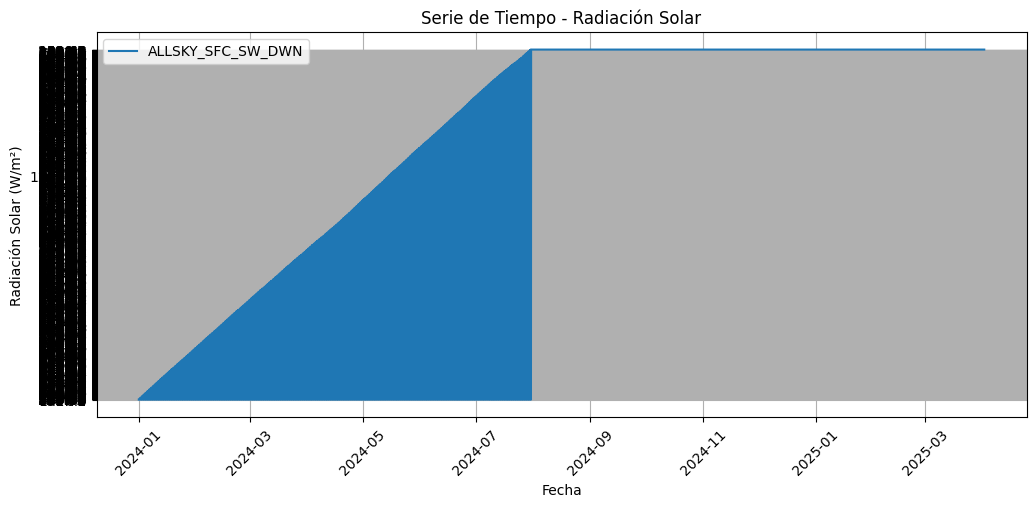

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(df['datatime'], df['ALLSKY_SFC_SW_DWN'], label='ALLSKY_SFC_SW_DWN')
plt.xlabel('Fecha')
plt.ylabel('Radiación Solar (W/m²)')
plt.title('Serie de Tiempo - Radiación Solar')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

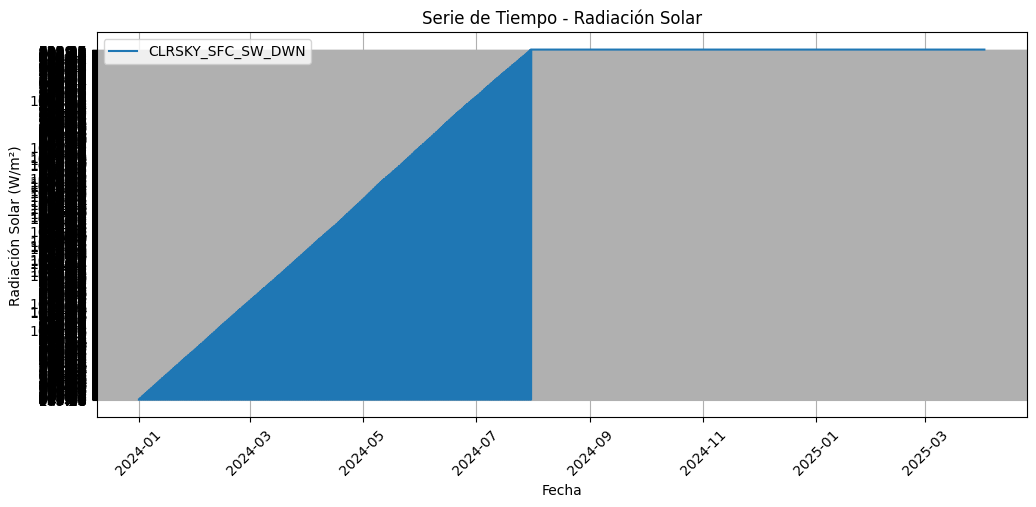

In [ ]:
plt.figure(figsize=(12, 5))
plt.plot(df['datatime'], df['CLRSKY_SFC_SW_DWN'], label='CLRSKY_SFC_SW_DWN')
plt.xlabel('Fecha')
plt.ylabel('Radiación Solar (W/m²)')
plt.title('Serie de Tiempo - Radiación Solar')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

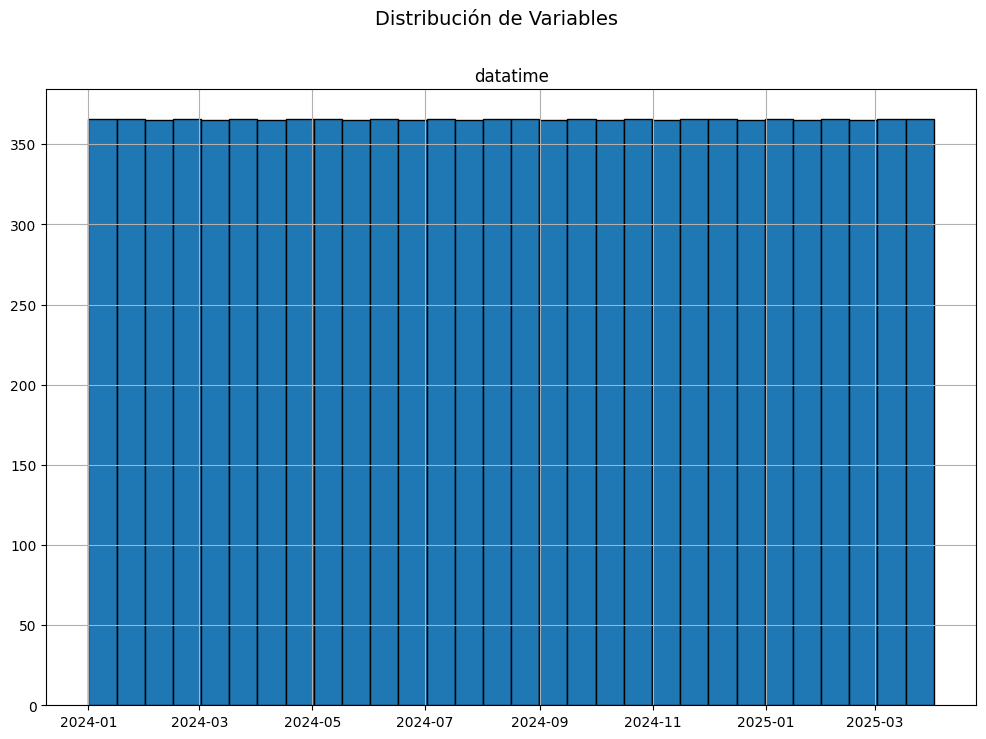

In [ ]:
# --- GRAFICO 2: Histogramas de todas las variables ---
df.hist(figsize=(12, 8), bins=30, edgecolor='black', grid=True)
plt.suptitle('Distribución de Variables', fontsize=14)
plt.show()

 # Matriz de Correlación
 La matriz de correlación muestra la relación entre las variables del dataset.
 Cada valor representa el coeficiente de correlación de Pearson (-1 a 1):
  - Valores cercanos a 1: Correlación positiva fuerte (ambas variables aumentan o disminuyen juntas).
  - Valores cercanos a -1: Correlación negativa fuerte (una variable aumenta mientras la otra disminuye).
  - Valores cercanos a 0: No hay correlación significativa.
 Nos ayuda a identificar qué variables están más relacionadas con la variable objetivo (Radiación Solar),
lo cual es útil para seleccionar características en el modelo de predicción.


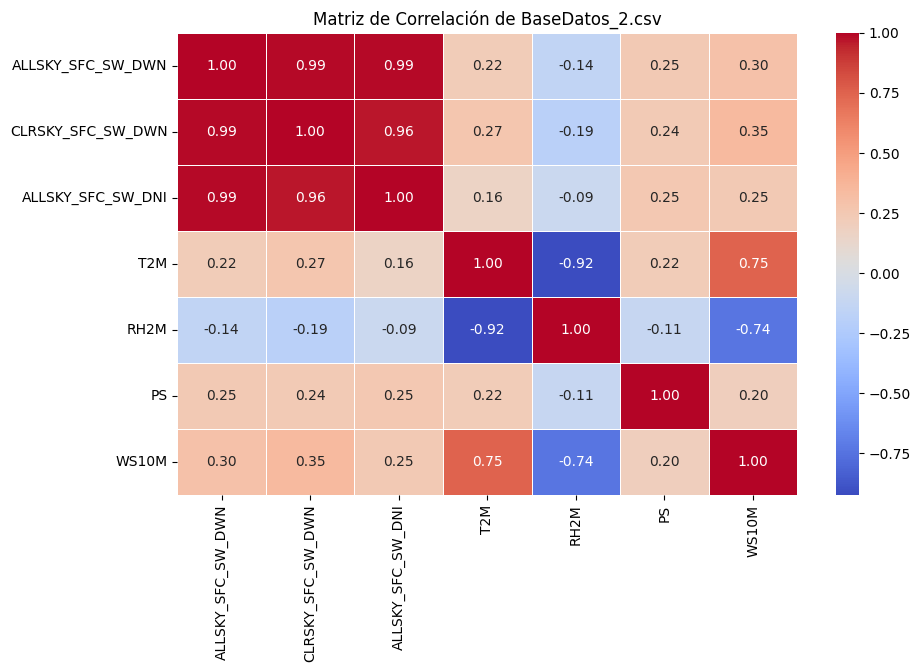

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# cargando base de datos
df = pd.read_csv('BaseDatos_2.csv')

# Calcular correlación y manejar un DataFrame potencialmente vacío
corr_matrix = df.corr(numeric_only=True)
if corr_matrix.empty:
    print("Correlation matrix is empty. Check for numeric columns and non-NaN values.")
else:
    # Draw the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Matriz de Correlación de BaseDatos_2.csv")
    plt.show()

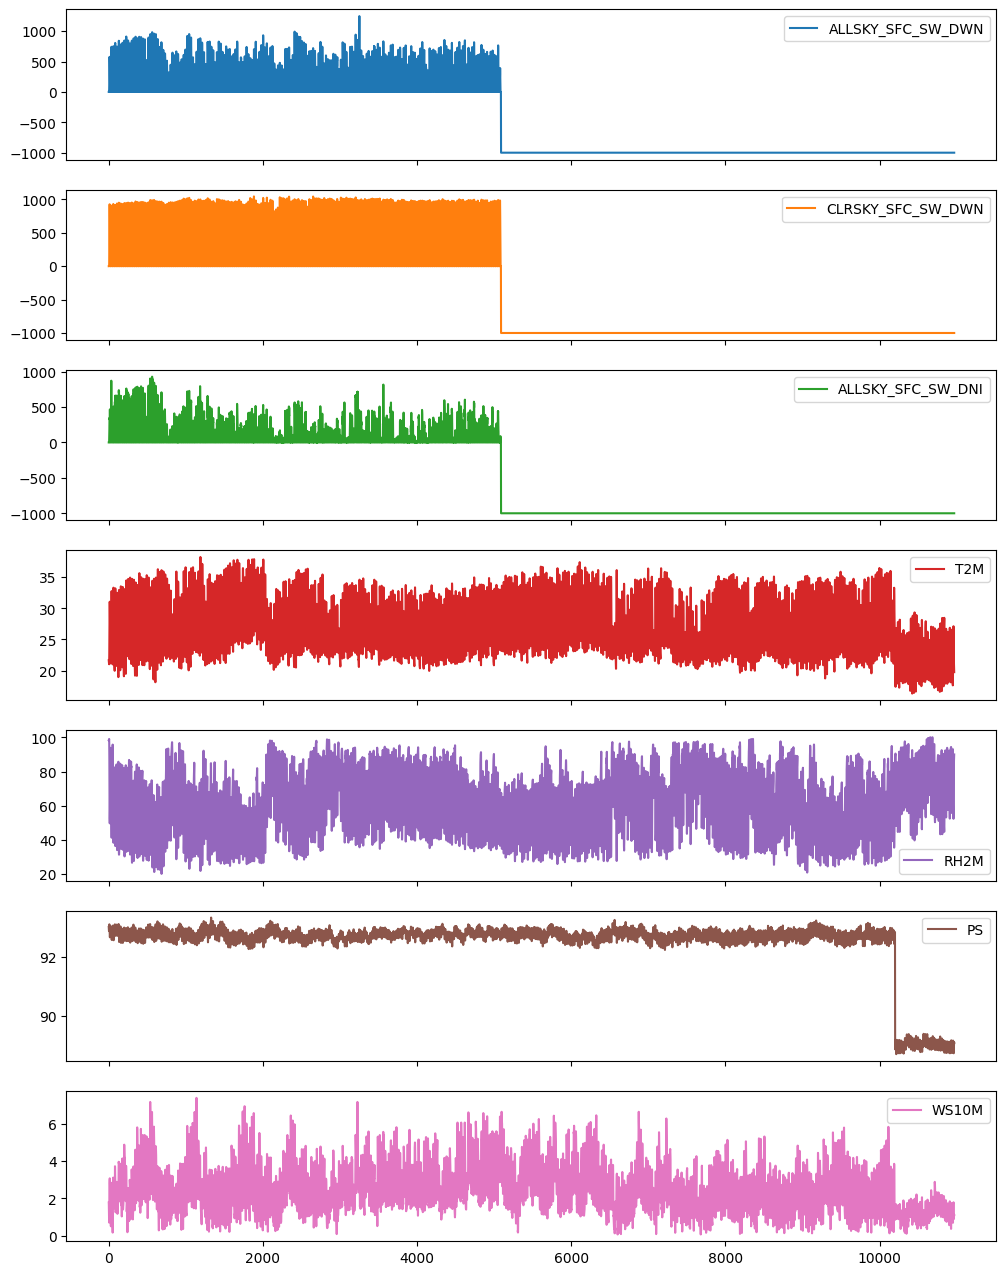

In [ ]:
cols = df.columns
N = df.shape[0]
plots = df[cols][0:N]
plots.index = df.index[0:N]
_= plots.plot(subplots=True, figsize=(12, 16))



In [ ]:
print(df.iloc[5088])  # Imprime las filas desde la 5101 hasta la 5105


datatime             2024-07-31 00:00:00
ALLSKY_SFC_SW_DWN                 -999.0
CLRSKY_SFC_SW_DWN                 -999.0
ALLSKY_SFC_SW_DNI                 -999.0
T2M                                25.06
RH2M                               66.58
PS                                 92.74
WS10M                               3.68
Name: 5088, dtype: object


In [ ]:
df_filtrado = df.iloc[:5088]
df_filtrado.to_csv('BaseDatos_filtrado.csv', index=False)
print("¡Archivo BaseDatos_filtrado.csv guardado con éxito!")

¡Archivo BaseDatos_filtrado.csv guardado con éxito!


In [ ]:
df = pd.read_csv('BaseDatos_filtrado.csv')
df

,datatime,ALLSKY_SFC_SW_DWN,CLRSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DNI,T2M,RH2M,PS,WS10M
0,2024-01-01 00:00:00,0.0,0.0,0.0,21.66,98.24,93.01,1.78
1,2024-01-01 01:00:00,0.0,0.0,0.0,21.47,98.28,92.94,1.70
2,2024-01-01 02:00:00,0.0,0.0,0.0,21.33,98.32,92.89,1.50
3,2024-01-01 03:00:00,0.0,0.0,0.0,21.24,98.39,92.88,1.26
4,2024-01-01 04:00:00,0.0,0.0,0.0,21.11,98.72,92.88,0.97
...,...,...,...,...,...,...,...,...
5083,2024-07-30 19:00:00,0.0,0.0,0.0,26.66,61.66,92.75,3.09
5084,2024-07-30 20:00:00,0.0,0.0,0.0,26.18,63.81,92.80,3.18
5085,2024-07-30 21:00:00,0.0,0.0,0.0,25.85,65.00,92.83,3.23
5086,2024-07-30 22:00:00,0.0,0.0,0.0,25.57,65.64,92.83,3.50


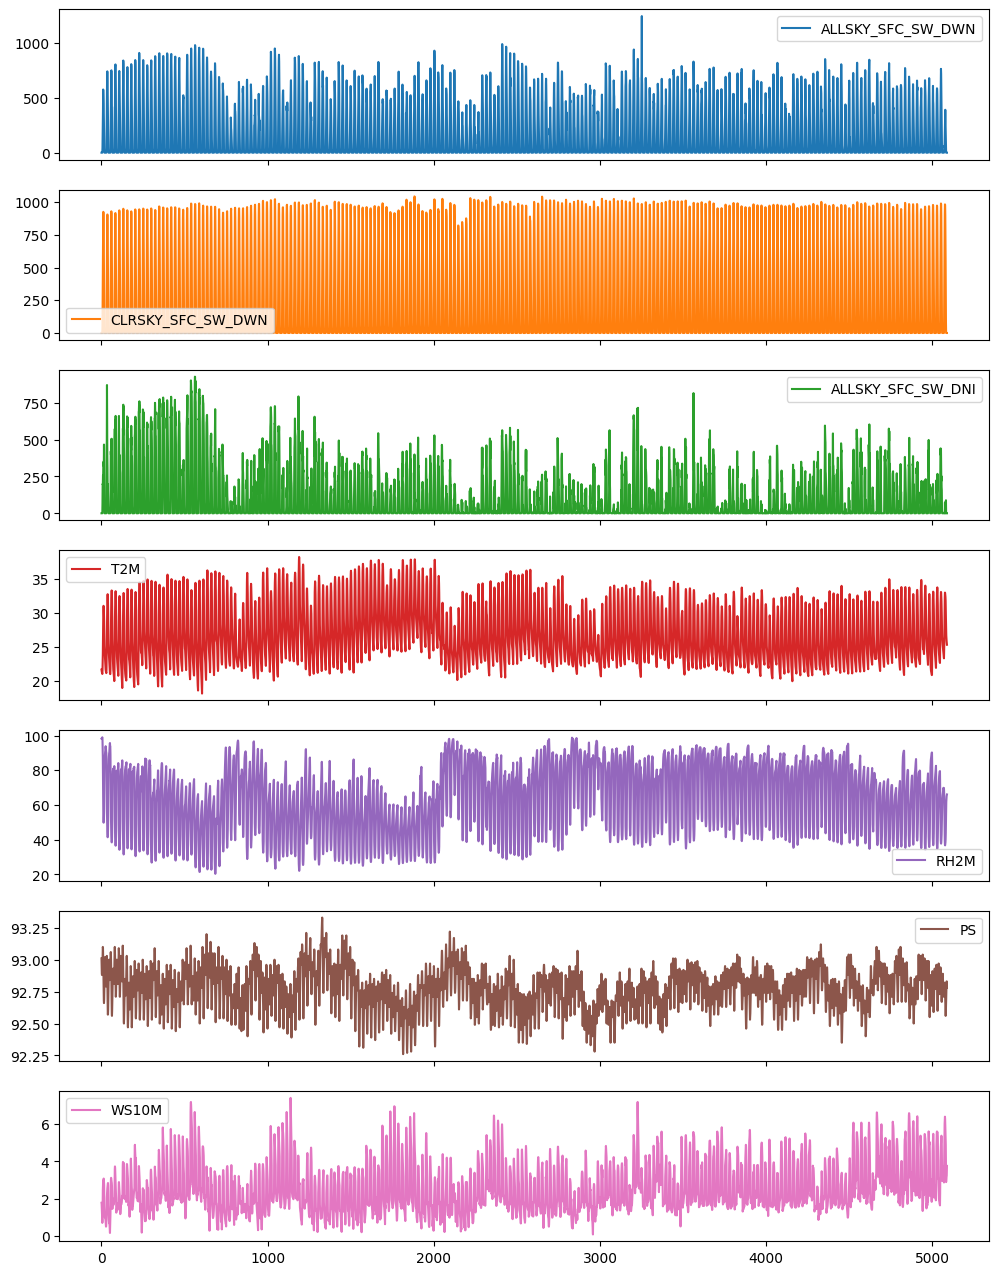

In [ ]:
cols = df.columns
N = df.shape[0]
plots = df[cols][0:N]
plots.index = df.index[0:N]
_= plots.plot(subplots=True, figsize=(12, 16))

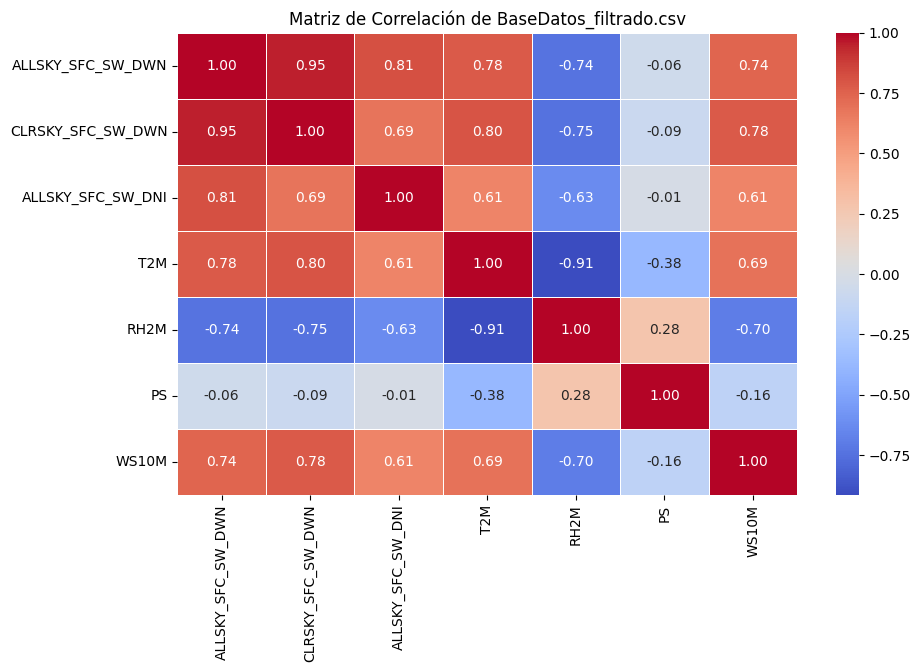

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# cargando base de datos
df = pd.read_csv('BaseDatos_filtrado.csv')

# Calcular correlación y manejar un DataFrame potencialmente vacío
corr_matrix = df.corr(numeric_only=True)
if corr_matrix.empty:
    print("Correlation matrix is empty. Check for numeric columns and non-NaN values.")
else:
    # Draw the heatmap
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title("Matriz de Correlación de BaseDatos_filtrado.csv")
    plt.show()

#Prepocesamiento
1. particion en datos train/val/test
2. Generación del dataset supervisado entrada y salida del modelo
3. Esclamiento


1.particion en datos train/val/test

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

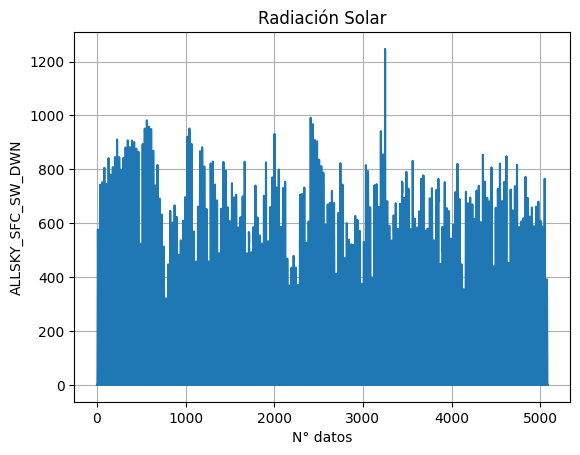

In [ ]:
# === 1. Cargar la muestra de datos ===
df = pd.read_csv('BaseDatos_filtrado.csv')
serie = df['ALLSKY_SFC_SW_DWN'].values.astype(float)
serie = serie.reshape(-1, 1)
plt.plot(serie)
plt.title('Radiación Solar')
plt.xlabel('N° datos')
plt.ylabel('ALLSKY_SFC_SW_DWN')
plt.grid()
plt.show()

In [ ]:
# === 2. Normalizar toda la serie ===
scaler = MinMaxScaler()
serie_scaled = scaler.fit_transform(serie)

def train_val_test_split(serie, tr_size=0.7, vl_size=0.15, ts_size=0.15):
    N = serie.shape[0]
    Ntrain = int(tr_size*N)
    Nval = int(vl_size*N)
    train = serie[:Ntrain]
    val = serie[Ntrain:Ntrain+Nval]
    test = serie[Ntrain+Nval:]
    return train, val, test

train, val, test = train_val_test_split(serie_scaled)
print(len(train), len(val), len(test))

3561 763 764


In [ ]:
# === 3. Crear conjunto supervisado ===
def create_dataset(data, time_steps=24):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)

time_steps = 24
X_train, y_train = create_dataset(train, time_steps)
X_val, y_val = create_dataset(val, time_steps)
X_test, y_test = create_dataset(test, time_steps)

print(X_train.shape, y_train.shape)

(3537, 24, 1) (3537, 1)


In [ ]:
#  Modelo LSTM
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mse')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 24, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Entrenamiento
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), batch_size=32)

Epoch 1/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - loss: 0.0361 - val_loss: 0.0027
Epoch 2/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - loss: 0.0032 - val_loss: 0.0025
Epoch 3/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0027 - val_loss: 0.0022
Epoch 4/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0022 - val_loss: 0.0020
Epoch 5/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 6/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 7/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - loss: 0.0020 - val_loss: 0.0016
Epoch 8/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.0018 - val_loss: 0.0020
Epoch 9/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - loss: 0.0016 - val_loss: 0.0017
Epoch 10/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 11/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 12/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
# Evaluación
y_pred = model.predict(X_test)
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test)

rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
mae = mean_absolute_error(y_test_inv, y_pred_inv)
r2 = r2_score(y_test_inv, y_pred_inv)

print(f'RMSE: {rmse:.2f}, MAE: {mae:.2f}, R²: {r2:.2f}')

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step
RMSE: 38.66, MAE: 25.33, R²: 0.98


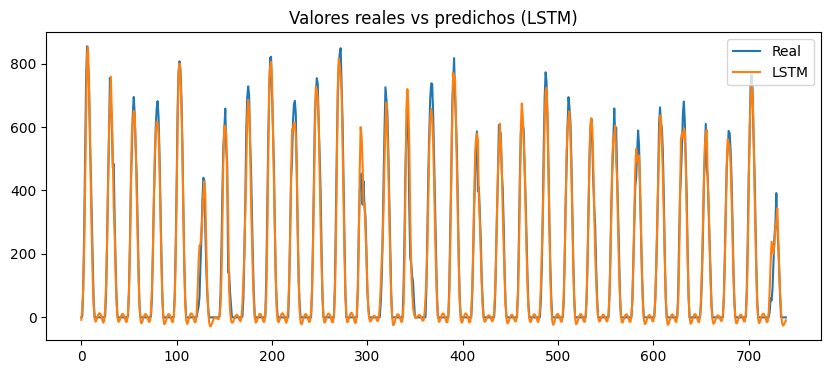

In [ ]:
# Visualización de predicciones
plt.figure(figsize=(10,4))
plt.plot(y_test_inv, label='Real')
plt.plot(y_pred_inv, label='LSTM')
plt.legend()
plt.title('Valores reales vs predichos (LSTM)')
plt.show()

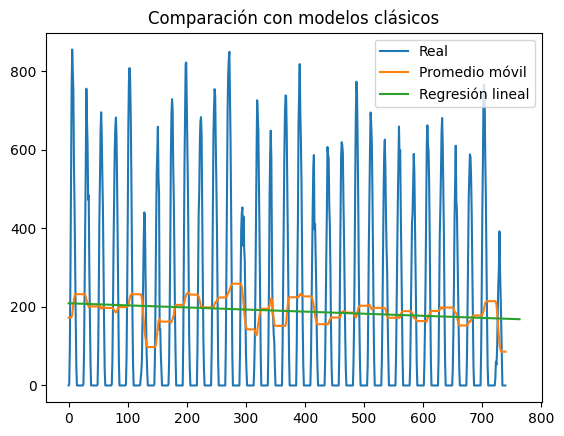

In [ ]:
# 📉 Comparación con métodos clásicos
from pandas import Series
window = 24
mov_avg = Series(test.flatten()).rolling(window=window).mean().shift(1).dropna()
lr_model = LinearRegression().fit(np.arange(len(test)).reshape(-1,1), test)
lr_pred = lr_model.predict(np.arange(len(test)).reshape(-1,1))

# graficar
plt.plot(scaler.inverse_transform(test)[window:], label='Real')
plt.plot(scaler.inverse_transform(mov_avg.values.reshape(-1,1)), label='Promedio móvil')
plt.plot(scaler.inverse_transform(lr_pred.reshape(-1,1)), label='Regresión lineal')
plt.legend()
plt.title('Comparación con modelos clásicos')
plt.show()

In [ ]:
# Guardar modelo
#model.save("modelo_lstm_radiacion.h5")
model.save("modelo_lstm_radiacion.keras")
print("Modelo guardado correctamente")


Modelo guardado correctamente


In [ ]:
from google.colab import files
files.download('modelo_lstm_radiacion.keras') # Corrected indentation

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>